In [ ]:
import spacy
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md

Introduction to spaCy

Hi, I'm Ines! I'm one of the core developers of spaCy, a popular library for advanced Natural Language Processing in Python.

In this lesson, we'll take a look at the most important concepts of spaCy and how to get started.

In [5]:
 
# Import spaCy
import spacy

# Create a blank English nlp object
nlp = spacy.blank("en")
# contains the processing pipeline
# includes language-specific rules for tokenization etc.
# The Doc object

# Created by processing a string of text with the nlp object
doc = nlp("Hello world!")

for token in doc:
    print(token.text)




Hello
world
!


In [7]:
# Index into the Doc to get a single Token
token = doc[1]

# Get the token text via the .text attribute
print(token.text)


# Token objects represent the tokens in a document – for example, a word or a punctuation character.

# To get a token at a specific position, you can index into the doc.

# Token objects also provide various attributes that let you access more information about the tokens. For example, the .text attribute returns the verbatim token text.

world


In [9]:
import spacy

# Load the small English pipeline
nlp = spacy.load("en_core_web_sm")

# Process a text
doc = nlp("She ate the pizza")

# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_,token.dep_,token.head.text)

She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


In [17]:
# Predicting Named Entities
# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text,ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


In [18]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

In [23]:
import spacy
from spacy.matcher import Matcher

 

nlp = spacy.load("en_core_web_sm")
doc = nlp("Upcoming iPhone X release date leaked as Apple reveals pre-orders")

# Initialize the Matcher with the shared vocabulary
matcher = Matcher(nlp.vocab)

# Create a pattern matching two tokens: "iPhone" and "X"
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]


# Add the pattern to the matcher
matcher.add("IPHONE_X_PATTERN", [pattern])

# Use the matcher on the doc
matches = matcher(doc)
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['iPhone X']


In [ ]:
# Part 1
# Write one pattern that only matches mentions of the full iOS versions: “iOS 7”, “iOS 11” and “iOS 10”.

In [25]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "After making the iOS update you won't notice a radical system-wide "
    "redesign: nothing like the aesthetic upheaval we got with iOS 7. Most of "
    "iOS 11's furniture remains the same as in iOS 10. But you will discover "
    "some tweaks once you delve a little deeper."
)

# Write a pattern for full iOS versions ("iOS 7", "iOS 11", "iOS 10")
pattern = [{"TEXT": "iOS"}, {"IS_DIGIT": True}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("IOS_VERSION_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 3
Match found: iOS 7
Match found: iOS 11
Match found: iOS 10


In [27]:
# Write one pattern that only matches forms of “download” (tokens with the lemma “download”), followed by a token with the part-of-speech tag "PROPN" (proper noun).
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "i downloaded Fortnite on my laptop and can't open the game at all. Help? "
    "so when I was downloading Minecraft, I got the Windows version where it "
    "is the '.zip' folder and I used the default program to unpack it... do "
    "I also need to download Winzip?"
)

# Write a pattern that matches a form of "download" plus proper noun
pattern = [{"LEMMA": "download"}, {"POS": "PROPN"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("DOWNLOAD_THINGS_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 3
Match found: downloaded Fortnite
Match found: downloading Minecraft
Match found: download Winzip


In [29]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "Features of the app include a beautiful design, smart search, automatic "
    "labels and optional voice responses."
)

# Write a pattern for adjective plus one or two nouns
pattern = [{"POS":"ADJ"  }, {"POS": "NOUN"}, {"POS": "NOUN", "OP": "?"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("ADJ_NOUN_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 5
Match found: beautiful design
Match found: smart search
Match found: automatic labels
Match found: optional voice
Match found: optional voice responses


In [ ]:
# Chapter 2: Large-scale data analysis with spaCy

In [36]:
# Shared vocab and string store (1)

import spacy

nlp =spacy.blank("en")
nlp.vocab.strings.add("coffee")
coffee_hash = nlp.vocab.strings["coffee"]
print(coffee_hash)
coffee_string =nlp.vocab.strings[coffee_hash]
print(coffee_string) 
coffee_string1 =nlp.vocab.strings[3197928453018144401]
print(coffee_string1) 

# Hashes can't be reversed – that's why we need to provide the shared vocab
# Raises an error if we haven't seen the string before
string = nlp.vocab.strings[3197928453018144401]

# Print the lexical attributes
print(lexeme.text, lexeme.orth, lexeme.is_alpha)

3197928453018144401
coffee
coffee


In [37]:
# exemes: entries in the vocabulary
# A Lexeme object is an entry in the vocabulary

doc = nlp("I love coffee")
lexeme = nlp.vocab["coffee"]

# Print the lexical attributes
print(lexeme.text, lexeme.orth, lexeme.is_alpha)

coffee 3197928453018144401 True


In [40]:
# The Doc object
# Create an nlp object
import spacy
nlp = spacy.blank("en")

# Import the Doc class
from spacy.tokens import Doc

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)
 
print(doc)

Hello world!


In [49]:
# The Span object (2)
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

# Create a span manually
span = Span(doc, 0, 2)

# Create a span with a label
span_with_label = Span(doc, 0, 2, label="GREETING")

# Add span to the doc.ents
doc.ents = [span_with_label]


for ent in doc.ents:
    print(ent.text,ent.label_)
    
    
    # The doc.ents are writable, so we can add entities manually by overwriting it with a list of spans.

Hello world GREETING


In [52]:
import spacy

nlp = spacy.blank("en")

# Import the Doc class
from spacy.tokens import Doc

# Desired text: "Go, get started!"
words = ["Go", ",", "get", "started", "!"]
spaces = [False, True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

Go, get started!


In [53]:
import spacy

nlp = spacy.blank("en")

# Import the Doc class
from spacy.tokens import Doc

# Desired text: "spaCy is cool!"
words = ["spaCy", "is", "cool", "!"]
spaces = [True, True, False, True]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

spaCy is cool! 


In [56]:
import spacy

nlp = spacy.blank("en")

# Import the Doc class
from spacy.tokens import Doc

# Desired text: "Oh, really?!"
words = ["Oh", ",", "really", "?", "!"]
spaces = [False, True, False, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

Oh, really?!


In [59]:
import spacy

nlp = spacy.blank("en")

# Import the Doc and Span classes
from spacy.tokens import Doc, Span

words = ["I", "like", "David", "Bowie"]
spaces = [True, True, True, False]

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = Span(doc, 2, 3, label="PERSON")
print(span.text, span.label_)

# Add the span to the doc's entities
doc.ents = [span]

# Print entities' text and labels
print([(ent.text, ent.label_) for ent in doc.ents])

I like David Bowie
David PERSON
[('David', 'PERSON')]


In [87]:
import spacy

nlp = spacy.load("en_core_web_md")

doc1 = nlp("It's a warm summer day")
doc2 = nlp("It's sunny outside")

# Get the similarity of doc1 and doc2
similarity = doc1.similarity(doc2)
print(similarity)

0.8220092482601077


In [82]:
# Recap: Rule-based Matching
# Initialize with the shared vocab
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

# Patterns are lists of dictionaries describing the tokens
pattern = [{"LEMMA": "love", "POS": "VERB"}, {"LOWER": "cats"}]
matcher.add("LOVE_CATS", [pattern])

# Operators can specify how often a token should be matched
pattern = [{"TEXT": "very", "OP": "+"}, {"TEXT": "happy"}]
matcher.add("VERY_HAPPY", [pattern])

# Calling matcher on doc returns list of (match_id, start, end) tuples
doc = nlp("I love Cats and I'm very very happy")
matches = matcher(doc)

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Match found: love Cats
Match found: very happy
Match found: very very happy


In [ ]:
# Patterns are lists of dictionaries, and each dictionary describes one token and its attributes. Patterns can be added to the matcher using the matcher.add method.

In [71]:
# Adding statistical predictions
matcher = Matcher(nlp.vocab)
matcher.add("DOG", [[{"LOWER": "golden"}, {"LOWER": "retriever"}]])
doc = nlp("I have a Golden Retriever")

for match_id, start, end in matcher(doc):
    span = doc[start:end]
    print("Matched span:", span.text)
    # Get the span's root token and root head token
    print("Root token:", span.root.text)
    print("Root head token:", span.root.head.text)
    # Get the previous token and its POS tag
    print("Previous token:", doc[start - 1].text, doc[start - 1].pos_)

Matched span: Golden Retriever
Root token: Retriever
Root head token: have
Previous token: a DET


In [ ]:
# Efficient phrase matching (1)
# PhraseMatcher like regular expressions or keyword search – but with access to the tokens!
# Takes Doc object as patterns
# More efficient and faster than the Matcher
# Great for matching large word lists

In [77]:
from spacy.matcher import PhraseMatcher 
matcher= PhraseMatcher(nlp.vocab)

pattern=nlp("Golden Retriever")
matcher.add("DOG",None,pattern)

doc = nlp("I have a Golden Retriever")

for match_id, start, end in matcher(doc):
    span = doc[start:end]
    print("matched span: ", span.text)

In [79]:
from spacy.matcher import PhraseMatcher
import spacy

nlp = spacy.load("en_core_web_sm")

matcher = PhraseMatcher(nlp.vocab)

# One target phrase
target = "Golden Retriever"

# Generate variations of the target phrase
variations = [
    target,
    target.lower(),
    target.upper(),
    target.capitalize(),
    target.replace(" ", ""),
    # Add more variations as needed
]

# Convert variations to spaCy Doc objects
pattern_docs = [nlp(variation) for variation in variations]

# Add the pattern to the matcher
matcher.add("DOG", None, *pattern_docs)

doc = nlp("I have a golden retriever, and my friend has a GoldenRetriever.")

for match_id, start, end in matcher(doc):
    span = doc[start:end]
    print("matched span:", span.text)


matched span: golden retriever
matched span: GoldenRetriever


In [85]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
doc = nlp(
    "Twitch Prime, the perks program for Amazon Prime members offering free "
    "loot, games and other benefits, is ditching one of its best features: "
    "ad-free viewing. According to an email sent out to Amazon Prime members "
    "today, ad-free viewing will no longer be included as a part of Twitch "
    "Prime for new members, beginning on September 14. However, members with "
    "existing annual subscriptions will be able to continue to enjoy ad-free "
    "viewing until their subscription comes up for renewal. Those with "
    "monthly subscriptions will have access to ad-free viewing until October 15."
)

# Create the match patterns
pattern1 = [{"LOWER": "amazon"}, {"IS_TITLE": True, "POS": "PROPN"}]
pattern2 = [{"LOWER": "ad"}, {"TEXT": "-"}, {"LOWER": "free"}, {"POS": "NOUN"}]

# Initialize the Matcher and add the patterns
matcher = Matcher(nlp.vocab)
matcher.add("PATTERN1", [pattern1])
matcher.add("PATTERN2", [pattern2])

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Print pattern string name and text of matched span
    print(doc.vocab.strings[match_id], doc[start:end].text)

PATTERN1 Amazon Prime
PATTERN1 Amazon Prime


In [ ]:
# Efficient phrase matching

In [ ]:
# Sometimes it’s more efficient to match exact strings instead of writing patterns describing the individual tokens. This is especially true for finite categories of things – like all countries of the world. We already have a list of countries, so let’s use this as the basis of our information extraction script. A list of string names is available as the variable COUNTRIES.

# Import the PhraseMatcher and initialize it with the shared vocab as the variable matcher.
# Add the phrase patterns and call the matcher on the doc.

In [92]:
import json
import spacy

with open("./data/countries.json",  encoding="utf8") as f:
    COUNTRIES = json.loads(f.read())

nlp = spacy.blank("en")
doc = nlp("Czech Republic may help Slovakia protect its airspace")

# Import the PhraseMatcher and initialize it
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

# Create pattern Doc objects and add them to the matcher
# This is the faster version of: [nlp(country) for country in COUNTRIES]
patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", patterns)

# Call the matcher on the test document and print the result
matches = matcher(doc)
print([doc[start:end] for match_id, start, end in matches])

[Czech Republic, Slovakia]


In [ ]:
# extracting countries and relationships

In [95]:
import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
import json
    
with open("./data/countries.json", encoding="utf8") as f:
    COUNTRIES = json.loads(f.read())
with open("./data/country_text.txt", encoding="utf8") as f:
    TEXT = f.read()

nlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(nlp.vocab)
patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", patterns)

# Create a doc and reset existing entities
doc = nlp(TEXT)
doc.ents = []

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE"
    span = Span(doc, start, end, label="GPE")

    # Overwrite the doc.ents and add the span
    doc.ents = list(doc.ents) + [span]

    # Get the span's root head token
    span_root_head = span.root.head
    # Print the text of the span root's head token and the span text
    print(span_root_head.text, "-->", span.text)

# Print the entities in the document
print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == "GPE"])

in --> Namibia
in --> South Africa
Africa --> Cambodia
of --> Kuwait
as --> Somalia
Somalia --> Haiti
Haiti --> Mozambique
in --> Somalia
for --> Rwanda
Britain --> Singapore
War --> Sierra Leone
of --> Afghanistan
invaded --> Iraq
in --> Sudan
of --> Congo
earthquake --> Haiti
[('Namibia', 'GPE'), ('South Africa', 'GPE'), ('Cambodia', 'GPE'), ('Kuwait', 'GPE'), ('Somalia', 'GPE'), ('Haiti', 'GPE'), ('Mozambique', 'GPE'), ('Somalia', 'GPE'), ('Rwanda', 'GPE'), ('Singapore', 'GPE'), ('Sierra Leone', 'GPE'), ('Afghanistan', 'GPE'), ('Iraq', 'GPE'), ('Sudan', 'GPE'), ('Congo', 'GPE'), ('Haiti', 'GPE')]


In [ ]:
#chapter 3 : Processing pipelines



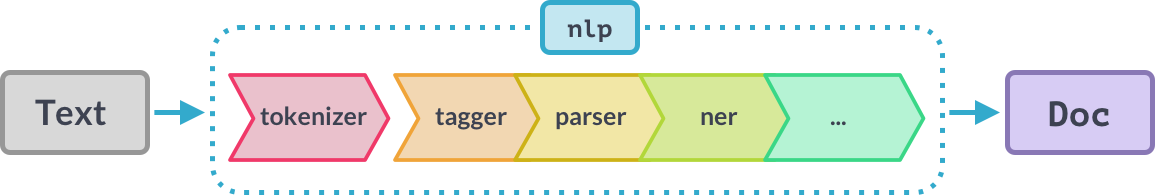


In [99]:
# <!-- What happens when you call nlp? -->
doc = nlp("This is a sentence.")
doc

This is a sentence.

In [101]:
# Pipeline attributes
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [102]:
print(nlp.pipeline)

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x00000216004E8100>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x0000021606197400>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x0000021600797DD0>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x00000216011FC040>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x00000216011FCCC0>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x00000216007973C0>)]


In [105]:
# Example: a simple component (1)

from spacy.language import Language
# Create the nlp object
nlp = spacy.load("en_core_web_sm")

# Define a custom component
@Language.component("custom_component")
def custom_component_function(doc):
    # Print the doc's length
    print("Doc length:", len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe("custom_component", first=True)

# Print the pipeline component names

doc = nlp("This is a sentence.")
print("Pipeline:", nlp.pipe_names)

Doc length: 5
Pipeline: ['custom_component', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [107]:
import spacy
from spacy.language import Language

# Define the custom component
@Language.component("length_component")
def length_component_function(doc):
    # Get the doc's length
    doc_length = len(doc)
    print(f"This document is {doc_length} tokens long.")
    # Return the doc
    return doc


# Load the small English pipeline
nlp = spacy.load("en_core_web_sm")

# Add the component first in the pipeline and print the pipe names
nlp.add_pipe("length_component", first=True)
print(nlp.pipe_names)

# Process a text
doc = nlp("This is a sentence.")

['length_component', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
This document is 5 tokens long.


In [ ]:
#   Complext compnenets

In [111]:
import spacy
from spacy.language import Language
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")
animals = ["Golden Retriever", "cat", "turtle", "Rattus norvegicus"]
animal_patterns = list(nlp.pipe(animals))
print("animal_patterns:", animal_patterns)
matcher = PhraseMatcher(nlp.vocab)
matcher.add("ANIMAL", animal_patterns)

# Define the custom component
@Language.component("animal_component")
def animal_component_function(doc):
    # Apply the matcher to the doc
    matches = matcher(doc)
    # Create a Span for each match and assign the label "ANIMAL"
    spans = [Span(doc, start, end, label="ANIMAL") for match_id, start, end in matches]
    # Overwrite the doc.ents with the matched spans
    doc.ents = spans
    return doc


# Add the component to the pipeline after the "ner" component
nlp.add_pipe("animal_component", after="ner")
print(nlp.pipe_names)

# Process the text and print the text and label for the doc.ents
doc = nlp("I have a cat and a Golden Retriever")
print([(ent.text, ent.label_) for ent in doc.ents])

animal_patterns: [Golden Retriever, cat, turtle, Rattus norvegicus]
['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'animal_component']
[('cat', 'ANIMAL'), ('Golden Retriever', 'ANIMAL')]


In [ ]:
# Setting custom attributes
# Add custom metadata to documents, tokens and spans
# Accessible via the ._ property
doc._.title = "My document"
token._.is_color = True
span._.has_color = False

# Registered on the global Doc, Token or Span using the set_extension method
# Import global classes
from spacy.tokens import Doc, Token, Span

# Set extensions on the Doc, Token and Span
Doc.set_extension("title", default=None)
Token.set_extension("is_color", default=False)
Span.set_extension("has_color", default=False)

In [ ]:
from spacy.tokens import Token

# Set extension on the Token with default value
Token.set_extension("is_color", default=False)

doc = nlp("The sky is blue.")

# Overwrite extension attribute value
doc[3]._.is_color = True

 

In [118]:
from spacy.tokens import Token

def get_is_color(token):
    colors = ["red", "yellow", "blue"]
    return token.text in colors

# Set extension on the Token with getter
Token.set_extension("iss_color", getter=get_is_color)


doc = nlp("The sky is blue.")
print(doc[3]._.iss_color, "-", doc[3].text)



True - blue


In [119]:
from spacy.tokens import Span

# Define getter function
def get_has_color(span):
    colors = ["red", "yellow", "blue"]
    return any(token.text in colors for token in span)

# Set extension on the Span with getter
Span.set_extension("has_color", getter=get_has_color)

doc = nlp("The sky is blue.")

print(doc[1:4]._.has_color, "-", doc[1:4].text)
print(doc[0:2]._.has_color, "-", doc[0:2].text)

True - sky is blue
False - The sky


In [120]:
# Method extensions
# Assign a function that becomes available as an object method
# Lets you pass arguments to the extension function
from spacy.tokens import Doc

# Define method with arguments
def has_token(doc, token_text):
    in_doc = token_text in [token.text for token in doc]
    return in_doc

# Set extension on the Doc with method
Doc.set_extension("has_token", method=has_token)

doc = nlp("The sky is blue.")
print(doc._.has_token("blue"), "- blue")
print(doc._.has_token("cloud"), "- cloud")

True - blue
False - cloud


In [ ]:
# 11. entities extension

In [ ]:
# Components with extensions

In [ ]:
import json
import spacy
from spacy.language import Language
from spacy.tokens import Span
from spacy.matcher import PhraseMatcher

with open("exercises/en/countries.json", encoding="utf8") as f:
    COUNTRIES = json.loads(f.read())

with open("exercises/en/capitals.json", encoding="utf8") as f:
    CAPITALS = json.loads(f.read())

nlp = spacy.blank("en")
matcher = PhraseMatcher(nlp.vocab)
matcher.add("COUNTRY", list(nlp.pipe(COUNTRIES)))


@Language.component("countries_component")
def countries_component_function(doc):
    # Create an entity Span with the label "GPE" for all matches
    matches = matcher(doc)
    doc.ents = [Span(doc, start, end, label="GPE") for match_id, start, end in matches]
    return doc


# Add the component to the pipeline
nlp.add_pipe("countries_component")
print(nlp.pipe_names)

# Getter that looks up the span text in the dictionary of country capitals
get_capital = lambda span: CAPITALS.get(span.text)

# Register the Span extension attribute "capital" with the getter get_capital
Span.set_extension("capital", getter=get_capital)

# Process the text and print the entity text, label and capital attributes
doc = nlp("Czech Republic may help Slovakia protect its airspace")
print([(ent.text, ent.label_, ent._.capital) for ent in doc.ents])

In [ ]:
# Creating traing data

spaCy’s rule-based Matcher is a great way to quickly create training data for named entity models. A list of sentences is available as the variable TEXTS. You can print it to inspect it. We want to find all mentions of different iPhone models, so we can create training data to teach a model to recognize them as "GADGET".

Write a pattern for two tokens whose lowercase forms match "iphone" and "x".
Write a pattern for two tokens: one token whose lowercase form matches "iphone" and a digit.

In [123]:
import json
import spacy
from spacy.matcher import Matcher
from spacy.tokens import Span

with open("./data/iphone.json", encoding="utf8") as f:
    TEXTS = json.loads(f.read())

nlp = spacy.blank("en")
matcher = Matcher(nlp.vocab)

# Two tokens whose lowercase forms match "iphone" and "x"
pattern1 = [{"LOWER": "iphone"}, {"LOWER": "x"}]

# Token whose lowercase form matches "iphone" and a digit
pattern2 = [{"LOWER": "iphone"}, {"IS_DIGIT": True}]

# Add patterns to the matcher and create docs with matched entities
matcher.add("GADGET", [pattern1, pattern2])
docs = []
for doc in nlp.pipe(TEXTS):
    matches = matcher(doc)
    spans = [Span(doc, start, end, label=match_id) for match_id, start, end in matches]
    print(spans)
    doc.ents = spans
    docs.append(doc)

[iPhone X]
[iPhone X]
[iPhone X]
[iPhone 8]
[iPhone 11, iPhone 8]
[]


After creating the data for our corpus, we need to save it out to a .spacy file. The code from the previous example is already available.

Instantiate the DocBin with the list of docs.
Save the DocBin to a file called train.spacy.

In [ ]:
import json
import spacy
from spacy.matcher import Matcher
from spacy.tokens import Span, DocBin
​
with open("exercises/en/iphone.json", encoding="utf8") as f:
    TEXTS = json.loads(f.read())
​
nlp = spacy.blank("en")
matcher = Matcher(nlp.vocab)
# Add patterns to the matcher
pattern1 = ([{"LOWER": "iphone"}, {"LOWER": "x"}])
pattern2 = [{"LOWER": "iphone"}, {"IS_DIGIT": True}]
matcher.add("GADGET", [pattern1, pattern2])
docs = []
for doc in nlp.pipe(TEXTS):
    matches = matcher(doc)
    spans = [Span(doc, start, end, label=match_id) for match_id, start, end in matches]
    doc.ents = spans
    docs.append(doc)
​
doc_bin = ____(____=____)
doc_bin.____(____)